In [ ]:
import pandas as pd

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd


ticker_symbol = 'AAPL'

ticker_data = yf.Ticker(ticker_symbol)

start_date = '2023-01-01'
end_date = '2023-12-31'
apple_ds = ticker_data.history(start=start_date, end=end_date)


apple_ds = apple_ds.reset_index()


apple_ds['Ticker'] = ticker_symbol
apple_ds = apple_ds[['Date', 'Ticker', 'Close']]


apple_ds.to_csv(f'{ticker_symbol}_historical_data.csv', index=False)

print(f'Historical data for {ticker_symbol} has been saved to {ticker_symbol}_historical_data.csv')
print(apple_ds)


Historical data for AAPL has been saved to AAPL_historical_data.csv
                         Date Ticker       Close
0   2023-01-03 00:00:00-05:00   AAPL  123.904633
1   2023-01-04 00:00:00-05:00   AAPL  125.182610
2   2023-01-05 00:00:00-05:00   AAPL  123.855095
3   2023-01-06 00:00:00-05:00   AAPL  128.412216
4   2023-01-09 00:00:00-05:00   AAPL  128.937302
..                        ...    ...         ...
245 2023-12-22 00:00:00-05:00   AAPL  192.868149
246 2023-12-26 00:00:00-05:00   AAPL  192.320221
247 2023-12-27 00:00:00-05:00   AAPL  192.419830
248 2023-12-28 00:00:00-05:00   AAPL  192.848206
249 2023-12-29 00:00:00-05:00   AAPL  191.802170

[250 rows x 3 columns]


In [ ]:
ticker_symbols = ['AAPL', 'TSLA', 'MSFT', 'NVDA']

combined_data = pd.DataFrame()

for ticker_symbol in ticker_symbols:
    ticker_data = yf.Ticker(ticker_symbol)

    start_date = '2023-01-01'
    end_date = '2023-12-31'
    company_data = ticker_data.history(start=start_date, end=end_date)

    company_data = company_data.reset_index()

    company_data['Ticker'] = ticker_symbol

    company_data = company_data[['Date', 'Ticker', 'Close']]

    combined_data = pd.concat([combined_data, company_data], ignore_index=True)

combined_data.to_csv('combined_historical_data.csv', index=False)

print(f'Combined historical data has been saved to combined_historical_data.csv')
print(combined_data)

Combined historical data has been saved to combined_historical_data.csv
                         Date Ticker       Close
0   2023-01-03 00:00:00-05:00   AAPL  123.904633
1   2023-01-04 00:00:00-05:00   AAPL  125.182610
2   2023-01-05 00:00:00-05:00   AAPL  123.855095
3   2023-01-06 00:00:00-05:00   AAPL  128.412216
4   2023-01-09 00:00:00-05:00   AAPL  128.937302
..                        ...    ...         ...
995 2023-12-22 00:00:00-05:00   NVDA   48.823704
996 2023-12-26 00:00:00-05:00   NVDA   49.272640
997 2023-12-27 00:00:00-05:00   NVDA   49.410622
998 2023-12-28 00:00:00-05:00   NVDA   49.515610
999 2023-12-29 00:00:00-05:00   NVDA   49.515610

[1000 rows x 3 columns]


In [ ]:
commodities = {
    'WTI Crude': 'CL=F',
    'Gold': 'GC=F'
}

commodities_data = pd.DataFrame()
y
for name, ticker in commodities.items():
    commodity_data = yf.Ticker(ticker).history(start='2023-01-01', end='2023-12-31')
    commodity_data = commodity_data[['Close']].rename(columns={'Close': f'{name}_Close'})
    commodity_data.reset_index(inplace=True)

    if commodities_data.empty:
        commodities_data = commodity_data
    else:
        commodities_data = pd.merge(commodities_data, commodity_data, on='Date', how='outer')

print(commodities_data.head())

                       Date  WTI Crude_Close   Gold_Close
0 2023-01-03 00:00:00-05:00        76.930000  1839.699951
1 2023-01-04 00:00:00-05:00        72.839996  1852.800049
2 2023-01-05 00:00:00-05:00        73.669998  1834.800049
3 2023-01-06 00:00:00-05:00        73.769997  1864.199951
4 2023-01-09 00:00:00-05:00        74.629997  1872.699951


In [ ]:
final_dataset = pd.merge(combined_data, commodities_data, on='Date', how='left')

print(final_dataset.head())

                       Date Ticker       Close  WTI Crude_Close   Gold_Close
0 2023-01-03 00:00:00-05:00   AAPL  123.904633        76.930000  1839.699951
1 2023-01-04 00:00:00-05:00   AAPL  125.182610        72.839996  1852.800049
2 2023-01-05 00:00:00-05:00   AAPL  123.855095        73.669998  1834.800049
3 2023-01-06 00:00:00-05:00   AAPL  128.412216        73.769997  1864.199951
4 2023-01-09 00:00:00-05:00   AAPL  128.937302        74.629997  1872.699951


In [ ]:
dollar_ticker = 'DX-Y.NYB'

dollar_data = yf.Ticker(dollar_ticker).history(start='2023-01-01', end='2023-12-31')
dollar_data = dollar_data[['Close']].rename(columns={'Close': 'Dollar_Close'})

dollar_data.reset_index(inplace=True)
dollar_data.set_index('Date', inplace=True)

print(dollar_data.head())


                           Dollar_Close
Date                                   
2023-01-03 00:00:00-05:00    104.519997
2023-01-04 00:00:00-05:00    104.250000
2023-01-05 00:00:00-05:00    105.040001
2023-01-06 00:00:00-05:00    103.879997
2023-01-09 00:00:00-05:00    103.000000


In [ ]:
final_dataset_with_dollar = pd.merge(final_dataset, dollar_data, on='Date', how='left')

final_dataset_with_dollar.set_index(['Date', 'Ticker'], inplace=True)

print(final_dataset_with_dollar.head())

                                       Close  WTI Crude_Close   Gold_Close  \
Date                      Ticker                                             
2023-01-03 00:00:00-05:00 AAPL    123.904633        76.930000  1839.699951   
2023-01-04 00:00:00-05:00 AAPL    125.182610        72.839996  1852.800049   
2023-01-05 00:00:00-05:00 AAPL    123.855095        73.669998  1834.800049   
2023-01-06 00:00:00-05:00 AAPL    128.412216        73.769997  1864.199951   
2023-01-09 00:00:00-05:00 AAPL    128.937302        74.629997  1872.699951   

                                  Dollar_Close  
Date                      Ticker                
2023-01-03 00:00:00-05:00 AAPL      104.519997  
2023-01-04 00:00:00-05:00 AAPL      104.250000  
2023-01-05 00:00:00-05:00 AAPL      105.040001  
2023-01-06 00:00:00-05:00 AAPL      103.879997  
2023-01-09 00:00:00-05:00 AAPL      103.000000  


In [ ]:
final_df = pd.DataFrame(final_dataset_with_dollar)

In [ ]:
final_df

,,Close,WTI Crude_Close,Gold_Close,Dollar_Close
Date,Ticker,,,,
2023-01-03 00:00:00-05:00,AAPL,123.904633,76.930000,1839.699951,104.519997
2023-01-04 00:00:00-05:00,AAPL,125.182610,72.839996,1852.800049,104.250000
2023-01-05 00:00:00-05:00,AAPL,123.855095,73.669998,1834.800049,105.040001
2023-01-06 00:00:00-05:00,AAPL,128.412216,73.769997,1864.199951,103.879997
2023-01-09 00:00:00-05:00,AAPL,128.937302,74.629997,1872.699951,103.000000
...,...,...,...,...,...
2023-12-22 00:00:00-05:00,NVDA,48.823704,73.559998,2057.100098,101.699997
2023-12-26 00:00:00-05:00,NVDA,49.272640,75.570000,2058.199951,101.470001
2023-12-27 00:00:00-05:00,NVDA,49.410622,74.110001,2081.899902,100.989998


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Compute correlation matrix
# corr =final_df.corr()

# # Generate heatmap
# plt.figure(figsize=(12, 10))
# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
# plt.title('Correlation Heatmap')
# plt.show()


ValueError: could not convert string to float: 'AAPL'

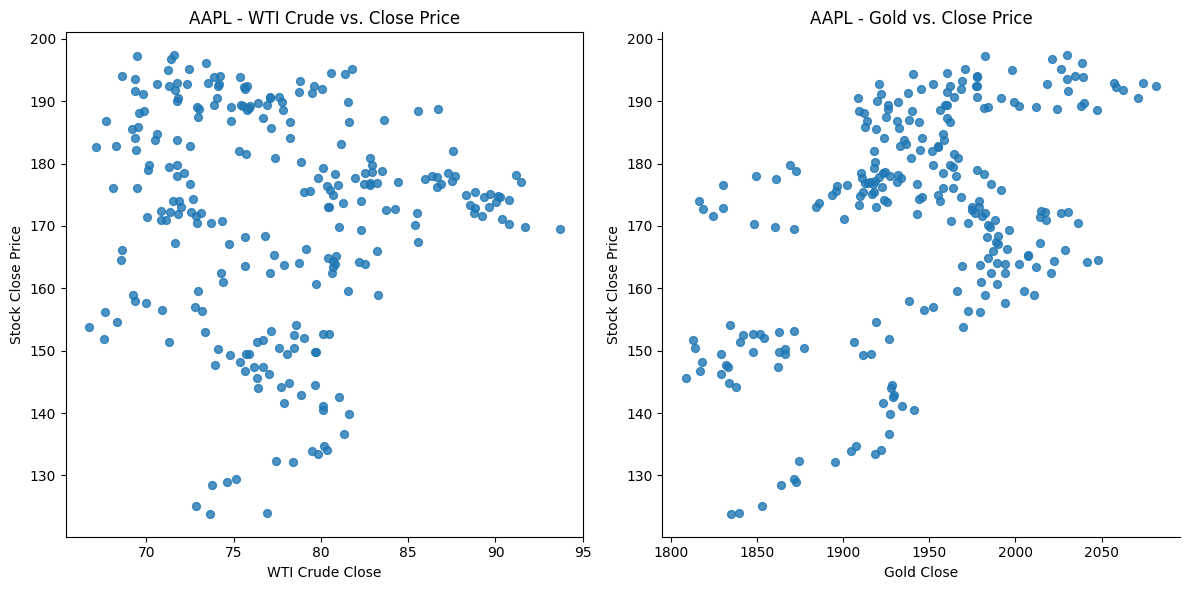

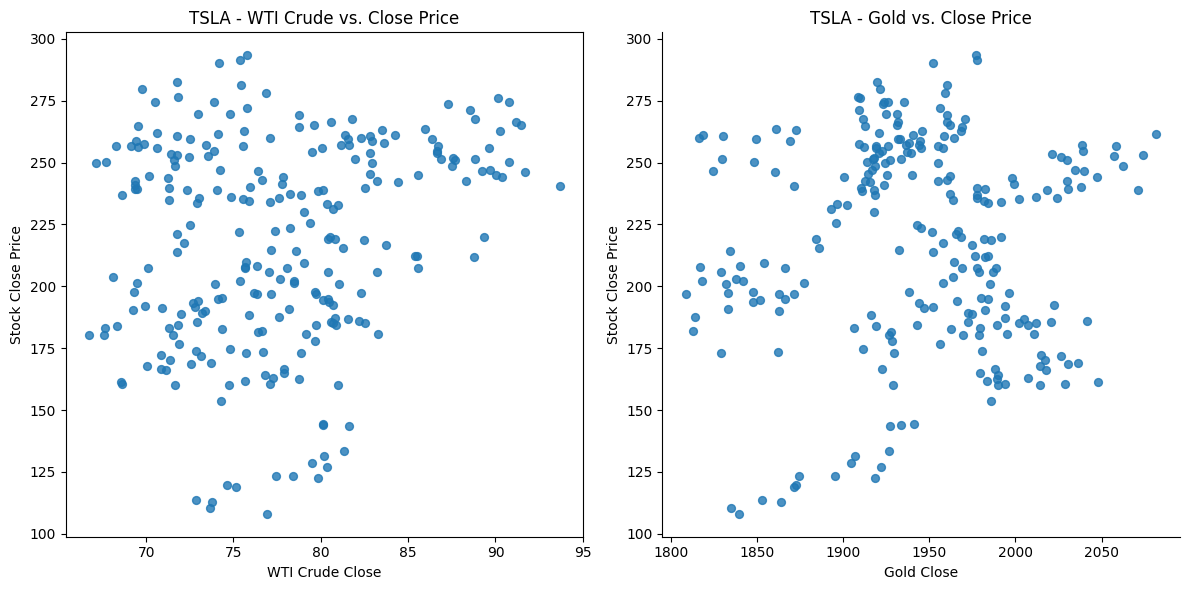

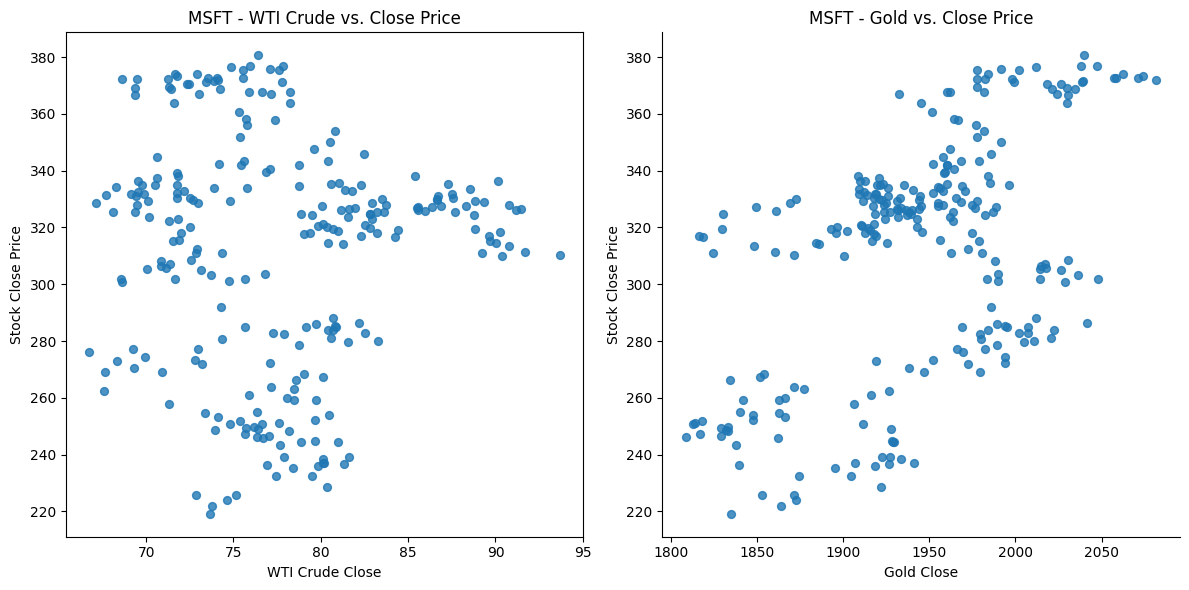

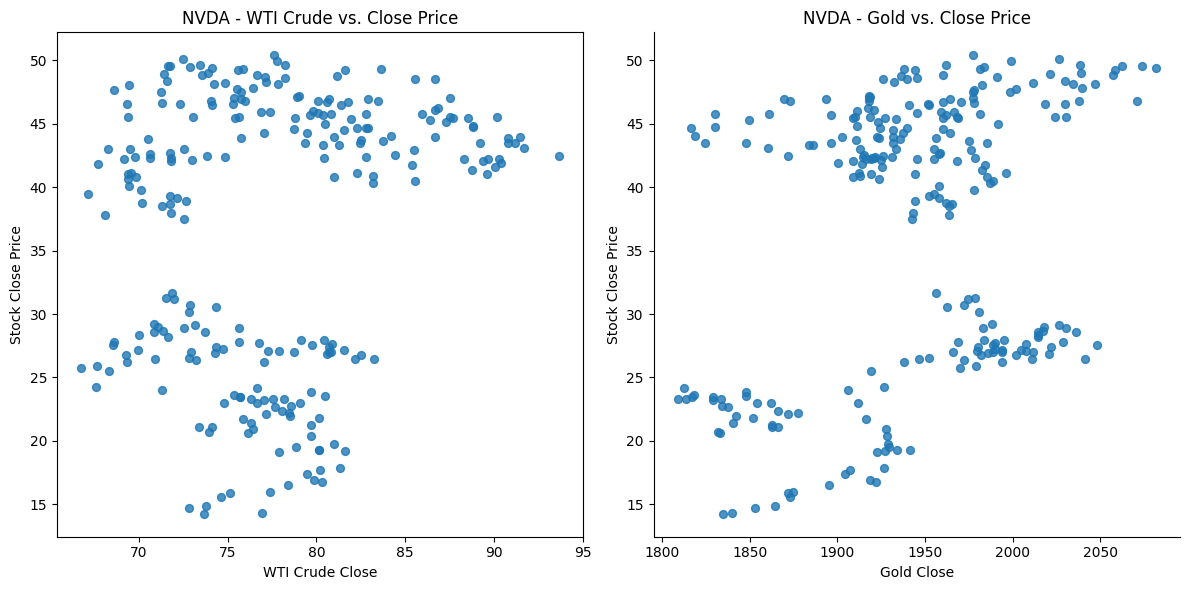

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

final_df = final_df.reset_index()

companies = final_df['Ticker'].unique()

for company in companies:
    company_df = final_df[final_df['Ticker'] == company]

    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(company_df['WTI Crude_Close'], company_df['Close'], s=32, alpha=0.8)
    plt.title(f'{company} - WTI Crude vs. Close Price')
    plt.xlabel('WTI Crude Close')
    plt.ylabel('Stock Close Price')

    plt.subplot(1, 2, 2)
    plt.scatter(company_df['Gold_Close'], company_df['Close'], s=32, alpha=0.8)
    plt.title(f'{company} - Gold vs. Close Price')
    plt.xlabel('Gold Close')
    plt.ylabel('Stock Close Price')

    plt.gca().spines[['top', 'right']].set_visible(False)

    plt.tight_layout()
    plt.show()


In [ ]:
print(final_df['Date'].dtype)

datetime64[ns, America/New_York]


In [ ]:
def create_lags(df, lags):
    """ Create lag features for each ticker """
    df_lagged = df.copy()
    for lag in range(1, lags + 1):
        df_lagged[f'Close_Lag_{lag}'] = df_lagged.groupby('Ticker')['Close'].shift(lag)
        df_lagged[f'WTI_Crude_Lag_{lag}'] = df_lagged.groupby('Ticker')['WTI Crude_Close'].shift(lag)
        df_lagged[f'Gold_Lag_{lag}'] = df_lagged.groupby('Ticker')['Gold_Close'].shift(lag)
        df_lagged[f'Dollar_Lag_{lag}'] = df_lagged.groupby('Ticker')['Dollar_Close'].shift(lag)
    return df_lagged

df_lagged = create_lags(final_df, lags)

df_lagged = df_lagged.dropna().reset_index(drop=True)


In [ ]:
df_lagged.head()

,Date,Ticker,Close,WTI Crude_Close,Gold_Close,Dollar_Close,Close_Lag_1,WTI_Crude_Lag_1,Gold_Lag_1,Dollar_Lag_1,Close_Lag_2,WTI_Crude_Lag_2,Gold_Lag_2,Dollar_Lag_2,Close_Lag_3,WTI_Crude_Lag_3,Gold_Lag_3,Dollar_Lag_3
0,2023-01-06 00:00:00-05:00,AAPL,128.412216,73.769997,1864.199951,103.879997,123.855095,73.669998,1834.800049,105.040001,125.182610,72.839996,1852.800049,104.250000,123.904633,76.930000,1839.699951,104.519997
1,2023-01-09 00:00:00-05:00,AAPL,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,123.855095,73.669998,1834.800049,105.040001,125.182610,72.839996,1852.800049,104.250000
2,2023-01-10 00:00:00-05:00,AAPL,129.511902,75.120003,1871.599976,103.239998,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,123.855095,73.669998,1834.800049,105.040001
3,2023-01-11 00:00:00-05:00,AAPL,132.246201,77.410004,1874.599976,103.190002,129.511902,75.120003,1871.599976,103.239998,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997
4,2023-01-12 00:00:00-05:00,AAPL,132.166916,78.389999,1895.500000,102.250000,132.246201,77.410004,1874.599976,103.190002,129.511902,75.120003,1871.599976,103.239998,128.937302,74.629997,1872.699951,103.000000


In [ ]:
df_lagged['Close_Diff'] = df_lagged.groupby('Ticker')['Close'].diff()
df_lagged['Close_Return'] = df_lagged.groupby('Ticker')['Close'].pct_change()
df_lagged['Gold_WTI_Spread'] = df_lagged['Gold_Close'] - df_lagged['WTI Crude_Close']
df_lagged = df_lagged.dropna().reset_index(drop=True)

df_lagged

,Date,Ticker,Close,WTI Crude_Close,Gold_Close,Dollar_Close,Close_Lag_1,WTI_Crude_Lag_1,Gold_Lag_1,Dollar_Lag_1,...,WTI_Crude_Lag_2,Gold_Lag_2,Dollar_Lag_2,Close_Lag_3,WTI_Crude_Lag_3,Gold_Lag_3,Dollar_Lag_3,Close_Diff,Close_Return,Gold_WTI_Spread
0,2023-01-09 00:00:00-05:00,AAPL,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,...,73.669998,1834.800049,105.040001,125.182610,72.839996,1852.800049,104.250000,0.525085,0.004089,1798.069954
1,2023-01-10 00:00:00-05:00,AAPL,129.511902,75.120003,1871.599976,103.239998,128.937302,74.629997,1872.699951,103.000000,...,73.769997,1864.199951,103.879997,123.855095,73.669998,1834.800049,105.040001,0.574600,0.004456,1796.479973
2,2023-01-11 00:00:00-05:00,AAPL,132.246201,77.410004,1874.599976,103.190002,129.511902,75.120003,1871.599976,103.239998,...,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,2.734299,0.021112,1797.189972
3,2023-01-12 00:00:00-05:00,AAPL,132.166916,78.389999,1895.500000,102.250000,132.246201,77.410004,1874.599976,103.190002,...,75.120003,1871.599976,103.239998,128.937302,74.629997,1872.699951,103.000000,-0.079285,-0.000600,1817.110001
4,2023-01-13 00:00:00-05:00,AAPL,133.504333,79.860001,1918.400024,102.199997,132.166916,78.389999,1895.500000,102.250000,...,77.410004,1874.599976,103.190002,129.511902,75.120003,1871.599976,103.239998,1.337418,0.010119,1838.540024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,2023-12-22 00:00:00-05:00,NVDA,48.823704,73.559998,2057.100098,101.699997,48.983681,73.889999,2039.099976,101.839996,...,74.220001,2034.500000,102.410004,49.597599,73.440002,2038.400024,102.169998,-0.159977,-0.003266,1983.540100
980,2023-12-26 00:00:00-05:00,NVDA,49.272640,75.570000,2058.199951,101.470001,48.823704,73.559998,2057.100098,101.699997,...,73.889999,2039.099976,101.839996,48.104790,74.220001,2034.500000,102.410004,0.448936,0.009195,1982.629951
981,2023-12-27 00:00:00-05:00,NVDA,49.410622,74.110001,2081.899902,100.989998,49.272640,75.570000,2058.199951,101.470001,...,73.559998,2057.100098,101.699997,48.983681,73.889999,2039.099976,101.839996,0.137981,0.002800,2007.789902
982,2023-12-28 00:00:00-05:00,NVDA,49.515610,71.769997,2073.899902,101.230003,49.410622,74.110001,2081.899902,100.989998,...,75.570000,2058.199951,101.470001,48.823704,73.559998,2057.100098,101.699997,0.104988,0.002125,2002.129906


In [ ]:
df_sorted = df_lagged.sort_values(by='Date')
df_sorted

,Date,Ticker,Close,WTI Crude_Close,Gold_Close,Dollar_Close,Close_Lag_1,WTI_Crude_Lag_1,Gold_Lag_1,Dollar_Lag_1,...,WTI_Crude_Lag_2,Gold_Lag_2,Dollar_Lag_2,Close_Lag_3,WTI_Crude_Lag_3,Gold_Lag_3,Dollar_Lag_3,Close_Diff,Close_Return,Gold_WTI_Spread
0,2023-01-09 00:00:00-05:00,AAPL,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,...,73.669998,1834.800049,105.040001,125.182610,72.839996,1852.800049,104.250000,0.525085,0.004089,1798.069954
246,2023-01-09 00:00:00-05:00,TSLA,119.769997,74.629997,1872.699951,103.000000,113.059998,73.769997,1864.199951,103.879997,...,73.669998,1834.800049,105.040001,113.639999,72.839996,1852.800049,104.250000,6.709999,0.059349,1798.069954
738,2023-01-09 00:00:00-05:00,NVDA,15.619053,74.629997,1872.699951,103.000000,14.850493,73.769997,1864.199951,103.879997,...,73.669998,1834.800049,105.040001,14.740557,72.839996,1852.800049,104.250000,0.768559,0.051753,1798.069954
492,2023-01-09 00:00:00-05:00,MSFT,223.900162,74.629997,1872.699951,103.000000,221.741196,73.769997,1864.199951,103.879997,...,73.669998,1834.800049,105.040001,225.852097,72.839996,1852.800049,104.250000,2.158966,0.009736,1798.069954
739,2023-01-10 00:00:00-05:00,NVDA,15.899893,75.120003,1871.599976,103.239998,15.619053,74.629997,1872.699951,103.000000,...,73.769997,1864.199951,103.879997,14.256834,73.669998,1834.800049,105.040001,0.280840,0.017981,1796.479973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-12-28 00:00:00-05:00,AAPL,192.848206,71.769997,2073.899902,101.230003,192.419830,74.110001,2081.899902,100.989998,...,75.570000,2058.199951,101.470001,192.868149,73.559998,2057.100098,101.699997,0.428375,0.002226,2002.129906
491,2023-12-29 00:00:00-05:00,TSLA,248.479996,71.650002,2062.399902,101.330002,253.179993,71.769997,2073.899902,101.230003,...,74.110001,2081.899902,100.989998,256.609985,75.570000,2058.199951,101.470001,-4.699997,-0.018564,1990.749901
245,2023-12-29 00:00:00-05:00,AAPL,191.802170,71.650002,2062.399902,101.330002,192.848206,71.769997,2073.899902,101.230003,...,74.110001,2081.899902,100.989998,192.320221,75.570000,2058.199951,101.470001,-1.046036,-0.005424,1990.749901
737,2023-12-29 00:00:00-05:00,MSFT,373.995972,71.650002,2062.399902,101.330002,373.240112,71.769997,2073.899902,101.230003,...,74.110001,2081.899902,100.989998,372.623505,75.570000,2058.199951,101.470001,0.755859,0.002025,1990.749901


In [ ]:
df_sorted['Year'] = df_sorted['Date'].dt.year
df_sorted['Month'] = df_sorted['Date'].dt.month
df_sorted['Day'] = df_sorted['Date'].dt.day
df_sorted['Day_of_Week'] = df_sorted['Date'].dt.dayofweek  # Monday=0, Sunday=6
df_sorted['Is_Weekend'] = (df_sorted['Day_of_Week'] >= 5).astype(int)  # 1 weekend, 0 otherwise
df_sorted['Quarter'] = df_sorted['Date'].dt.quarter  # 1, 2, 3, 4



In [ ]:
df_sorted = df_sorted.drop(columns=['Date'])
df_sorted

,Ticker,Close,WTI Crude_Close,Gold_Close,Dollar_Close,Close_Lag_1,WTI_Crude_Lag_1,Gold_Lag_1,Dollar_Lag_1,Close_Lag_2,...,Dollar_Lag_3,Close_Diff,Close_Return,Gold_WTI_Spread,Year,Month,Day,Day_of_Week,Is_Weekend,Quarter
0,AAPL,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,123.855095,...,104.250000,0.525085,0.004089,1798.069954,2023,1,9,0,0,1
246,TSLA,119.769997,74.629997,1872.699951,103.000000,113.059998,73.769997,1864.199951,103.879997,110.339996,...,104.250000,6.709999,0.059349,1798.069954,2023,1,9,0,0,1
738,NVDA,15.619053,74.629997,1872.699951,103.000000,14.850493,73.769997,1864.199951,103.879997,14.256834,...,104.250000,0.768559,0.051753,1798.069954,2023,1,9,0,0,1
492,MSFT,223.900162,74.629997,1872.699951,103.000000,221.741196,73.769997,1864.199951,103.879997,219.158371,...,104.250000,2.158966,0.009736,1798.069954,2023,1,9,0,0,1
739,NVDA,15.899893,75.120003,1871.599976,103.239998,15.619053,74.629997,1872.699951,103.000000,14.850493,...,105.040001,0.280840,0.017981,1796.479973,2023,1,10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,AAPL,192.848206,71.769997,2073.899902,101.230003,192.419830,74.110001,2081.899902,100.989998,192.320221,...,101.699997,0.428375,0.002226,2002.129906,2023,12,28,3,0,4
491,TSLA,248.479996,71.650002,2062.399902,101.330002,253.179993,71.769997,2073.899902,101.230003,261.440002,...,101.470001,-4.699997,-0.018564,1990.749901,2023,12,29,4,0,4
245,AAPL,191.802170,71.650002,2062.399902,101.330002,192.848206,71.769997,2073.899902,101.230003,192.419830,...,101.470001,-1.046036,-0.005424,1990.749901,2023,12,29,4,0,4
737,MSFT,373.995972,71.650002,2062.399902,101.330002,373.240112,71.769997,2073.899902,101.230003,372.036713,...,101.470001,0.755859,0.002025,1990.749901,2023,12,29,4,0,4


In [ ]:
# from sklearn.preprocessing import LabelEncoder

# # Initialize the LabelEncoder
# label_encoder = LabelEncoder()

# # Fit and transform the Ticker column
# df_sorted['Ticker_Encoded'] = label_encoder.fit_transform(df_sorted['Ticker'])

df_sorted = pd.get_dummies(df_sorted, columns=['Ticker'])


In [ ]:
df_sorted

,Close,WTI Crude_Close,Gold_Close,Dollar_Close,Close_Lag_1,WTI_Crude_Lag_1,Gold_Lag_1,Dollar_Lag_1,Close_Lag_2,WTI_Crude_Lag_2,...,Year,Month,Day,Day_of_Week,Is_Weekend,Quarter,Ticker_AAPL,Ticker_MSFT,Ticker_NVDA,Ticker_TSLA
0,128.937302,74.629997,1872.699951,103.000000,128.412216,73.769997,1864.199951,103.879997,123.855095,73.669998,...,2023,1,9,0,0,1,True,False,False,False
246,119.769997,74.629997,1872.699951,103.000000,113.059998,73.769997,1864.199951,103.879997,110.339996,73.669998,...,2023,1,9,0,0,1,False,False,False,True
738,15.619053,74.629997,1872.699951,103.000000,14.850493,73.769997,1864.199951,103.879997,14.256834,73.669998,...,2023,1,9,0,0,1,False,False,True,False
492,223.900162,74.629997,1872.699951,103.000000,221.741196,73.769997,1864.199951,103.879997,219.158371,73.669998,...,2023,1,9,0,0,1,False,True,False,False
739,15.899893,75.120003,1871.599976,103.239998,15.619053,74.629997,1872.699951,103.000000,14.850493,73.769997,...,2023,1,10,1,0,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,192.848206,71.769997,2073.899902,101.230003,192.419830,74.110001,2081.899902,100.989998,192.320221,75.570000,...,2023,12,28,3,0,4,True,False,False,False
491,248.479996,71.650002,2062.399902,101.330002,253.179993,71.769997,2073.899902,101.230003,261.440002,74.110001,...,2023,12,29,4,0,4,False,False,False,True
245,191.802170,71.650002,2062.399902,101.330002,192.848206,71.769997,2073.899902,101.230003,192.419830,74.110001,...,2023,12,29,4,0,4,True,False,False,False
737,373.995972,71.650002,2062.399902,101.330002,373.240112,71.769997,2073.899902,101.230003,372.036713,74.110001,...,2023,12,29,4,0,4,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split

X = df_sorted.drop(columns=['Close'])
y = df_sorted['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)

xgb_predictions = xgb_model.predict(X_test)

xgb_mse = mean_squared_error(y_test, xgb_predictions)
print(f'XGBoost Regressor Mean Squared Error: {xgb_mse}')
r2 = r2_score(y_test, xgb_predictions)
print(f'R²: {r2}')


XGBoost Regressor Mean Squared Error: 189.10307043649354
R²: 0.985377670100339


In [ ]:
from sklearn.model_selection import GridSearchCV

xgb_model = xgb.XGBRegressor()

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best MSE found: ", -grid_search.best_score_)


Best parameters found:  {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Best MSE found:  16.236687350249895


In [ ]:
pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.3 MB/s eta 0:00:00


In [ ]:
print(X_train.dtypes)

X_train = X_train.apply(pd.to_numeric, errors='coerce')


bool_columns = ['Ticker_AAPL', 'Ticker_MSFT', 'Ticker_NVDA', 'Ticker_TSLA']
X_train[bool_columns] = X_train[bool_columns].astype(int)

WTI Crude_Close    float64
Gold_Close         float64
Dollar_Close       float64
Close_Lag_1        float64
WTI_Crude_Lag_1    float64
Gold_Lag_1         float64
Dollar_Lag_1       float64
Close_Lag_2        float64
WTI_Crude_Lag_2    float64
Gold_Lag_2         float64
Dollar_Lag_2       float64
Close_Lag_3        float64
WTI_Crude_Lag_3    float64
Gold_Lag_3         float64
Dollar_Lag_3       float64
Close_Diff         float64
Close_Return       float64
Gold_WTI_Spread    float64
Year                 int32
Month                int32
Day                  int32
Day_of_Week          int32
Is_Weekend           int64
Quarter              int32
Ticker_AAPL           bool
Ticker_MSFT           bool
Ticker_NVDA           bool
Ticker_TSLA           bool
dtype: object


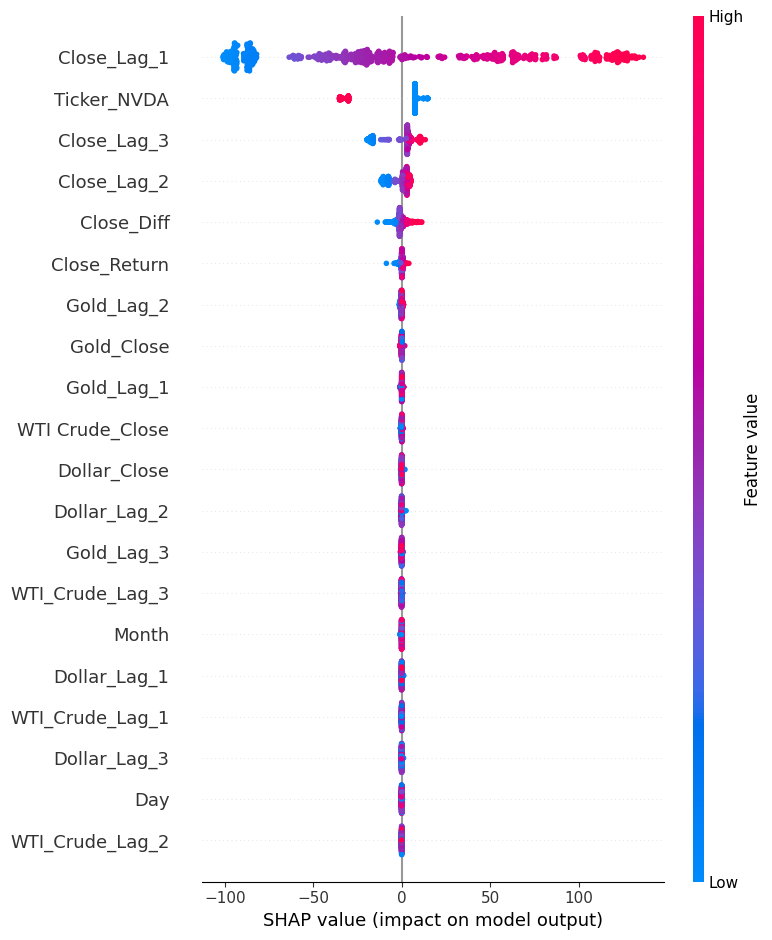

In [ ]:
import shap

explainer = shap.Explainer(xgb_model, X_train)

shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train)


In [ ]:
importance = pd.DataFrame(shap_values.values, columns=X_train.columns).abs().mean()
importance = importance.sort_values(ascending=False)


# TO-DO
*   By Sectors
*   Scenario Analysis
*   Individual and Combined Analysis




